## Entangling qubits with a CNOT gate
<div class="alert alert-block alert-info">
<b>Note:</b>
Many quantum algorithms leverage a property of quantum mechanics that Einstein called "spooky actions at a distance", known as *quantum entanglement*. In quantum computing, entanglement requires the use of quantum gates that operate on more than one qubit at a time. One such gate is the CNOT, which we'll use in conjunction with a Hadamard gate to maximally entangle two qubits.


To demonstrate entanglement, we'll create a two-wire quantum circuit with the [Qiskit](https://qiskit.org/) framework:

In [13]:
# Include the necessary imports for this program
# let's import some modules for the presentation
# %matplotlib notebook
import time
import numpy as np
from sympy import Matrix

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

<div class="alert alert-block alert-info">
<b>Note:</b>
So that we can examine the quantum state vector when the qubits are entangled, we're going to use Qiskit's "statevector_simulator". We'll create the canonical entanglement circuit, that consists of a Hadamard followed by a CNOT:

In [59]:
# Create a Quantum Register with 2 qubits
qr = QuantumRegister(2)

# Create a Classical Register with 2 bits
cr = ClassicalRegister(2)

# Create a Quantum Circuit from the quantum and classical registers
circ = QuantumCircuit(qr, cr)

# Place Hadamard gate on the top wire, putting this qubit in a superposition.
circ.h(qr[0])

# Add a CX (CNOT) gate across the top two wires, entangling the qubits.
circ.cx(qr[0], qr[1])

# Draw the new circuit
circ.draw(output='mpl')


<div class="alert alert-block alert-info">
<b>Note:</b>
Now that the quantum circuit has been defined and drawn, we'll execute it on a $statevector$_$simulator$ simulator and examine the quantum state, which is one of the four [Bell states](https://en.wikipedia.org/wiki/Bell_state).
</div>
We're going to use a simulator in Qiskit, referred to as $"statevector$_$simulator"$, that will show us the quantum state upon running the circuit. 

In [60]:
# Use the Aer statevector_simulator backend
from qiskit import Aer
backend_sv_sim = Aer.get_backend('statevector_simulator')

# Execute the circuit on the state vector simulator
job_sim = execute(circ, backend_sv_sim)

# Grab the results from the job.
result_sim = job_sim.result()

# Obtain the state vector for the quantum circuit
quantum_state = result_sim.get_statevector(circ, decimals=3)

# Output the quantum state vector in a manner that contains a comma-delimited string.
quantum_state


#### The Bell states
<div class="alert alert-block alert-info">
<b>Note:</b>
The output of the previously run cell contains a comma-separated string that represents the circuit's quantum state, in this case one of the Bell states. We can also represent the state vector as a column vector
</div>


In [62]:
# representation of the quantum state in a Matrix
M = Matrix(quantum_state)
print ("\nState Vector as a Matrix representation: ")
M

<div class="alert alert-block alert-info">
<b>Note:</b>
This $Bell$ $state$ may also be represented using Dirac notation as

$$\vert\Phi^+\rangle = \frac{\vert00\rangle+\vert11\rangle}{\sqrt{2}}$$

where $\vert\Phi^+\rangle$ is the usual way of denoting this particular Bell state. Note that the $\sqrt{2}$ in the denominator normalizes the state so that its probabilities sum to 1

We can represent this quantum state in vector notation: 
Knowing that 

$$
 \vert00\rangle = 
 \begin{pmatrix}
  1 \\
  0 \\
  0 \\
  0
 \end{pmatrix} \ \ \ \ \vert11\rangle =
 \begin{pmatrix}
  0 \\
  0 \\
  0 \\
  1
 \end{pmatrix}
$$


$$\vert\Phi^+\rangle = \frac{1}{\sqrt{2}}  
 \begin{bmatrix}
 \begin{pmatrix}
  1 \\
  0 \\
  0 \\
  0
 \end{pmatrix} + 
 \begin{pmatrix}
  0 \\
  0 \\
  0 \\
  1
 \end{pmatrix}
 \end{bmatrix} \ \ \ \ \vert\Phi^+\rangle = \frac{1}{\sqrt{2}} 
 \begin{pmatrix}
  1 \\
  0 \\
  0 \\
  1
 \end{pmatrix}
 $$


#### There are three other Bell states, for a total of four.
Each of the Bell states are the _maximally entangled_ states for two qubits, meaning that their measurements are most highly correlated. These additional Bell states are represented in vector notaton and Dirac notation as follows:

$$
 \vert\Phi^-\rangle = \frac{1}{\sqrt{2}}
 \begin{bmatrix}
  1 \\
  0 \\
  0 \\
  -1
 \end{bmatrix}=
\frac{\vert00\rangle-\vert11\rangle}{\sqrt{2}}
$$

$$
 \vert\Psi^+\rangle = \frac{1}{\sqrt{2}} 
 \begin{bmatrix}
  0 \\
  1 \\
  1 \\
  0
 \end{bmatrix}=
\frac{\vert01\rangle+\vert10\rangle}{\sqrt{2}}
$$

$$
 \vert\Psi^-\rangle = \frac{1}{\sqrt{2}}
 \begin{bmatrix}
  0 \\
  1 \\
  -1 \\
  0
 \end{bmatrix}=
\frac{\vert01\rangle-\vert10\rangle}{\sqrt{2}}
$$

### To verify that the qubits are entangled, let's measure them several times:
<div class="alert alert-block alert-info">
<b>Note:</b> Before the execution on the $qasm$_$simulator$, we must add a measure instruction to our circuit to measure the qubits into the classical registers


In [63]:
# Use the Aer qasm_simulator backend
from qiskit import Aer
backend_sim = Aer.get_backend('qasm_simulator')

# Measure the qubits into the classical registers
circ.measure(qr, cr)

# Execute the circuit on the qasm simulator, running it 1000 times.
job_sim = execute(circ, backend_sim, shots=1000)

# Grab the results from the job.
result_sim = job_sim.result()

# Print the counts, which are contained in a Python dictionary
counts_sim = result_sim.get_counts(circ)
print(counts_sim)

<div class="alert alert-block alert-info">
<b>Note:</b>
The result of the measurements should be fairly evenly split between $\vert00\rangle$ and $\vert11\rangle$.

In [64]:
# Plot the results on a histogram
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts_sim)

#### Now it's your turn to play!
<div class="alert alert-block alert-info">
<b>Note:</b>
Here's a challenge for you: In the following cells, run the previous cells, to produce the Bell state and associated circuits. 

First, create the circuit for the Bell state:
</div>

In [ ]:
# Include the necessary imports for this program


# Create a Quantum Register with 2 qubits


# Create a Classical Register with 2 bits


# Create a Quantum Circuit from the quantum and classical registers


# Place appropriate gates on the wires to achieve the desired Bell state


# Draw the circuit


<div class="alert alert-block alert-info">
<b>Note:</b>
Next, execute the circuit on a state vector simulator and output its state vector

In [ ]:
# Use the Aer statevector_simulator backend


# Execute the circuit on the state vector simulator


# Grab the results from the job.


# Obtain the state vector for the quantum circuit


# Output the quantum state vector in a manner that contains a comma-delimited string.


<div class="alert alert-block alert-info">
<b>Note:</b>
To verify that the qubits are entangled, measure them several times on a quantum simulator that includes measurements:

In [ ]:
# Use the Aer qasm_simulator backend


# Add the Measure of the qubits into the classical registers


# Execute the circuit on the qasm simulator, running it 1000 times.


# Grab the results from the job.


# Print the counts, which are contained in a Python dictionary


<div class="alert alert-block alert-info">
<b>Note:</b>
For the Bell state $\vert\Phi^+\rangle$, the result of the measurements should be fairly evenly split between $\vert00\rangle$ and $\vert11\rangle$.

Finally, plot the results on a histogram.
</div>

In [ ]:
# Plot the results on a histogram


### Using a real backend to run experiment
<div class="alert alert-block alert-info">
<b>Note:</b> let's see how to access a real backend device

In [65]:
# import IBMQ from qiskit
from qiskit import IBMQ

# Configure your IBMQ credentials. 
# Run the following command to store your API token locally for later use. This saves your account to disk.
IBMQ.save_account('YOUR_API_TOKEN')

# Accessing your IBMQ backends. Load your account to access your "backend" devices
provider = IBMQ.load_account()

# A provider gives access to specific devices, depending on the group, the project or the hub your have access to:
# list your provider
print(provider)


<div class="alert alert-block alert-info">
<b>Note:</b>
By default, all IBM Q accounts have access to the same, open project  <b>(hub: ibm-q, group: open, project: main).</b>

In [20]:
# Alternatively, if you do not want to save your credentials to disk and only intend to use them during the current session, 
# you can use: 
'provider = IBMQ.enable_account('YOUR_API_TOKEN')'


In [66]:
# List the backends that are in a status "available" for sending jobs as some backends might be in "maintenance" 
# Also we don't want to use the simulator. 

available_backends=provider.backends(simulator=False, operational=True)
available_backends


In [67]:
# list the least busy "backend" among the available ones. 
from qiskit.providers.ibmq import least_busy

lb_backend = least_busy(available_backends)

print('The least busy backend is: ', lb_backend.name())

In [68]:
# let's do some import to get a graphical view of the configuration and properties    
from qiskit.tools.jupyter import jupyter_magics 

# Let's print the configuration and properties of that device
lb_backend

In [24]:
# Execute the circuit on the real backend device, running it 1000 times.
job_real = execute(circ, lb_backend, shots=1000)

# Grab the results from the job.
result_real = job_real.result()

# Print the counts, which are contained in a Python dictionary
counts_real = result_real.get_counts(circ)

In [69]:
# plot the histogram and compare it with the previous run on the simulator
from qiskit.tools.visualization import plot_histogram

legend=['simulator', 'real device']

plot_histogram([counts_sim, counts_real], legend=legend)

### Now it's your turn to play!
<div class="alert alert-block alert-info">
<b>Note:</b>
In the following cells, run the previous circuit on a real backend device and compare the results with the simulator.
First, load your account, set your provider and use one of the real backend to execute your circuit:
</div>


In [ ]:
# import IBMQ from qiskit


# Configure your IBMQ credentials. 
# Save your account to disk if it's not yet done


# Accessing your IBMQ backends. Load your account to access your "backend" devices


# list your provider


In [ ]:
# Set your provider using the group "open" 



In [ ]:
# List the backends that are in a status "available" for sending jobs". 



In [ ]:
# Execute the circuit on the "least busy real backend device", running it 1000 times.


# Grab the results from the job.


# Print the counts, which are contained in a Python dictionary


In [ ]:
# plot the counts histogram and compare it with the previous run on the simulator
from qiskit.tools.visualization import plot_histogram
legend=['simulator', 'real device']

plot_histogram(...... 

<div class="alert alert-block alert-info">
<b>Note:</b>
If you successfully completed this challenge, then congratulations !!!

<div class="alert alert-block alert-info">
  <strong>##########################################   Additional Chalenge   ########################################</strong> 
</div>

### Here's an additional challenge for you:  Modify and run the previous cells to produce one of the remaining three Bell states $\vert\Psi^+\rangle$ and associated circuits. 
The result of the measurements should be fairly evenly split between  $\vert01\rangle$ and $\vert10\rangle$



<div class="alert alert-success">
  <strong>Here below you'll find the Solution for the "Additional Chalenge"</strong> 
</div>

<div class="alert alert-success">
<b>Note:</b>
Produce the Bell state $\vert\Psi^+\rangle$ and associated circuits. 





$$
 \vert\Psi^+\rangle = \frac{1}{\sqrt{2}} 
 \begin{bmatrix}
  0 \\
  1 \\
  1 \\
  0
 \end{bmatrix}=
\frac{\vert01\rangle+\vert10\rangle}{\sqrt{2}}
$$
</div>



<div class="alert alert-success">
<b>Note:</b>
To produce the Bell state $\vert\Psi^+\rangle$. What needs to be applied to the state $$\vert\Phi^+\rangle = \frac{\vert00\rangle+\vert11\rangle}{\sqrt{2}}$$ to be changed to $$\vert\Psi^+\rangle = \frac{\vert01\rangle+\vert10\rangle}{\sqrt{2}}$$ 
    
Just change the qubit 1 from $|0>$ to $|1>$ and $|1>$ to $|0>$. so that $$\frac{\vert00\rangle+\vert11\rangle}{\sqrt{2}} --->  \frac{\vert01\rangle+\vert10\rangle}{\sqrt{2}}$$

This is exactly what the $X$ gate does. And we need to apply it to $Qubit$ $1$ 



</div>


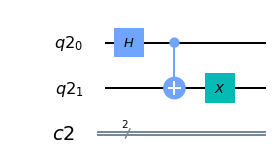

In [44]:
# Create a Quantum Register with 2 qubits
qr = QuantumRegister(2)

# Create a Classical Register with 2 bits
cr = ClassicalRegister(2)

# Create a Quantum Circuit from the quantum and classical registers
circ = QuantumCircuit(qr, cr)

# Place Hadamard gate on the top wire, putting this qubit in a superposition.
circ.h(qr[0])

# Add a CX (CNOT) gate across the top two wires, entangling the qubits.
circ.cx(qr[0], qr[1])

# Add a X (NOT) gate on wire 1 
circ.x(qr[1])

# Draw the new circuit
circ.draw(output='mpl')

In [45]:
# Use the Aer qasm_simulator backend
from qiskit import Aer
backend_sim = Aer.get_backend('qasm_simulator')

# Measure the qubits into the classical registers
circ.measure(qr, cr)

# Execute the circuit on the qasm simulator, running it 1000 times.
job_sim = execute(circ, backend_sim, shots=1000)

# Grab the results from the job.
result_sim = job_sim.result()

# Print the counts, which are contained in a Python dictionary
counts_sim = result_sim.get_counts(circ)
print(counts_sim)

{'10': 515, '01': 485}


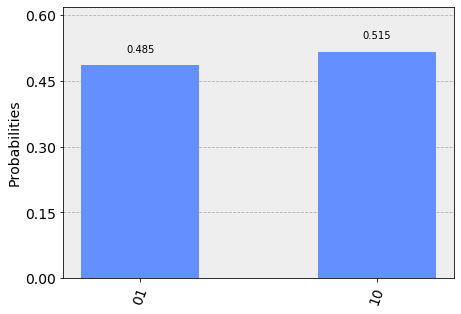

In [46]:
# Plot the results on a histogram
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts_sim)

<div class="alert alert-success">
<b>Note:</b>
Just to finish the demonstration, as we have produced the Bell state $\vert\Psi^+\rangle$. What needs to be applied to this state to produce the Bell state $\vert\Psi^-\rangle$ ? 

Well, we'll just have to use a quantum gate that modifies one of the qubit state from |1> to -|1> and leave the state |0> unchanged. 

This is exactly what the gate $Z$ is doing ... and we must apply it to $qubit$ $0$
    
   
Just change from $$\frac{\vert01\rangle+\vert10\rangle}{\sqrt{2}} --->  \frac{\vert01\rangle-\vert10\rangle}{\sqrt{2}}$$



The $Pauli-Z$ gate acts on a single qubit. It equates to a rotation around the Z-axis of the Bloch sphere by $π$ radians. Thus, It leaves the basis state $|0⟩$  unchanged and maps $|1⟩$  to $−|1⟩$ . It is sometimes called phase-flip and represented by the Pauli Z matrix:

$$ Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}.$$

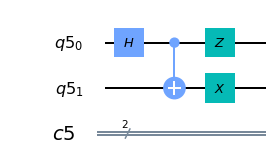

In [51]:
# Create a Quantum Register with 2 qubits
qr = QuantumRegister(2)

# Create a Classical Register with 2 bits
cr = ClassicalRegister(2)

# Create a Quantum Circuit from the quantum and classical registers
circ = QuantumCircuit(qr, cr)

# Place Hadamard gate on the top wire, putting this qubit in a superposition.
circ.h(qr[0])

# Add a CX (CNOT) gate across the top two wires, entangling the qubits.
circ.cx(qr[0], qr[1])

# Add a X (NOT) gate on wire 1 
circ.x(qr[1])

# Add a Z (Pauli Z) gate to wire 0
circ.z(qr[0])

# Draw the new circuit
circ.draw(output='mpl')

In [52]:
# Use the Aer qasm_simulator backend
from qiskit import Aer
backend_sim = Aer.get_backend('qasm_simulator')

# Measure the qubits into the classical registers
circ.measure(qr, cr)

# Execute the circuit on the qasm simulator, running it 1000 times.
job_sim = execute(circ, backend_sim, shots=1000)

# Grab the results from the job.
result_sim = job_sim.result()

# Print the counts, which are contained in a Python dictionary
counts_sim = result_sim.get_counts(circ)
print(counts_sim)

{'10': 471, '01': 529}


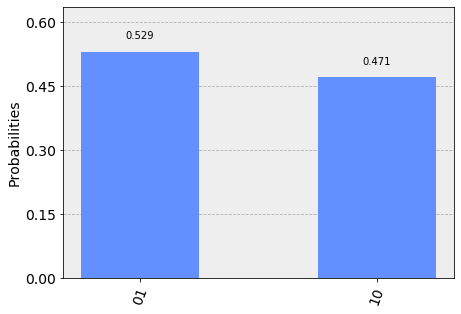

In [53]:
# Plot the results on a histogram
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts_sim)